# PCA: Image Reconstruction using Less Information

(311, 323, 4)


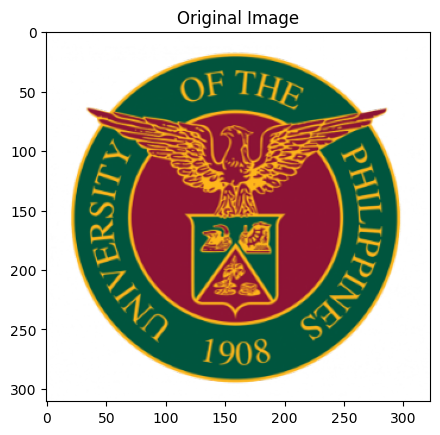

In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# References: 
# https://iq.opengenus.org/applications-of-pca/
# https://www.section.io/engineering-education/image-compression-using-pca/

# Read and show the image
img = mpimg.imread('UP_logo.png')
print(img.shape) 
plt.title('Original Image')
plt.imshow(img)
lay4 = img[:,:,3] # This is the 4th layer (transparency)
imgRGB = img[:,:,:3] # Take only layers 1-3 (RGB values)

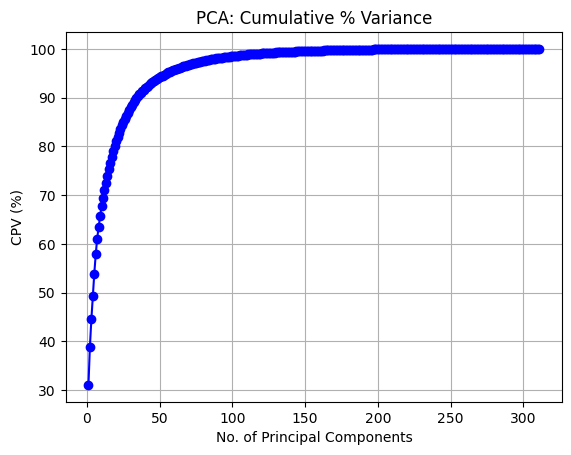

Shape of image before PCA: (311, 969)
Shape of image after PCA: (311, 100)
CPV at 100 PCs: 98.50538969039917%


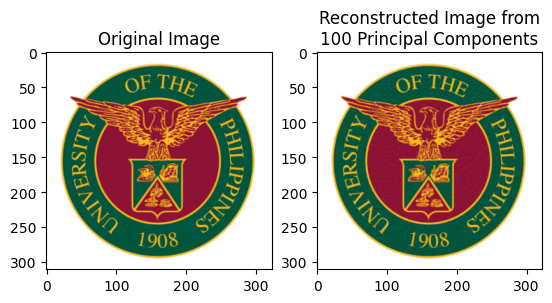

In [2]:
# Reshape the image
img_r = np.reshape(imgRGB, (311, 323*3)) 

# Perform PCA to view the CPV plot
pca = PCA().fit(img_r)
var = pca.explained_variance_ratio_
cpv = np.cumsum(var)*100
plt.plot(np.arange(cpv.size)+1,cpv,'bo-')
plt.title('PCA: Cumulative % Variance')
plt.xlabel('No. of Principal Components')
plt.ylabel('CPV (%)')
plt.grid()
plt.show()

# Perform PCA to get only the top n_comp PCs
n_comp = 100
pca = PCA(n_components=n_comp).fit(img_r)
img_transformed = pca.transform(img_r)

print(f"Shape of image before PCA: {img_r.shape}") 
print(f"Shape of image after PCA: {img_transformed.shape}") 
print(f"CPV at {n_comp} PCs: {100*np.sum(pca.explained_variance_ratio_)}%")

# Reconstruct the image using only the top PCs (less information)
temp = pca.inverse_transform(img_transformed) 
temp = np.reshape(temp, (311, 323 ,3))

# Clip the image to maintain range of RGB values as [0..1]
temp = np.minimum(temp, 1.0)
temp = np.maximum(temp, 0.0)

# Bring back the transparency layer
temp = np.concatenate((temp,lay4[...,np.newaxis]),axis=2)

# Show the compressed image
plt.subplot(121)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(122)
plt.title(f"Reconstructed Image from\n{n_comp} Principal Components")
plt.imshow(temp)